<a href="https://colab.research.google.com/github/atul799/AI-Essentials-Course/blob/main/LogisticalRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistical Regression (Classifier)**
* In Logistical Regression also commonly called Classification, goal is to predict a category given input fetaures.
* Classification is a very popular Machine Learning model and has uses in many everyday and business situations.
* Some examples where classification is used are:
  * email classification: Spam or  not Spam
  * Student Grade prediction: Pass or Fail
  * Purchase decision: Buy or not Buy
* Lets understand the mechanism of classification through an example:
* We are given historic data where feature is size of tumor and label (target output) is for given tumor size if it is benign(not dangerous) represented as 0 or malignant(dangerous) represented as 1.
|Tumor size in millimeter|Cancer|
|--|--|
|3|0|
|5|0|
|8|1|
|4|0|
|9|1|
|10|1|
* if we try Linear regression for this dataset

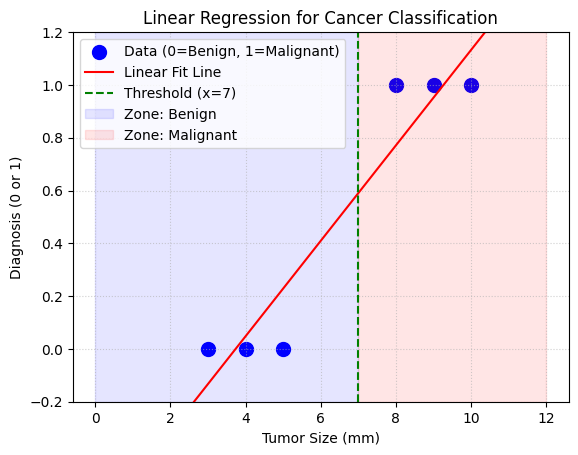

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Data: Tumor Size (x) and Diagnosis (y: 0=Benign, 1=Malignant)
x = np.array([3, 5, 8, 4, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 1, 0, 1, 1])

# 2. Fit Linear Regression model
model = LinearRegression()
model.fit(x, y)

# 3. Generate line for the plot
x_line = np.linspace(0, 12, 100).reshape(-1, 1)
y_line = model.predict(x_line)

# 4. Plotting
plt.scatter(x, y, color='blue', s=100, label='Data (0=Benign, 1=Malignant)')
plt.plot(x_line, y_line, color='red', label='Linear Fit Line')

# 5. Drawing the Threshold at x=7
plt.axvline(x=7, color='green', linestyle='--', label='Threshold (x=7)')
plt.fill_betweenx([-0.2, 1.2], 0, 7, color='blue', alpha=0.1, label='Zone: Benign')
plt.fill_betweenx([-0.2, 1.2], 7, 12, color='red', alpha=0.1, label='Zone: Malignant')

plt.xlabel('Tumor Size (mm)')
plt.ylabel('Diagnosis (0 or 1)')
plt.title('Linear Regression for Cancer Classification')
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

* Notice in the above that even with Linear regression we could sort of understand if tumor size is benign(0) or malignant(1) if we simply set a threshold, that is, if we use a cutoff of $y=0.5$, any tumor larger than $7 \text{ mm}$ falls into the "Malignant Zone."
* What happens if we add another point to data which is a bit outside of range of data we had sofar, example add x=50 cm and y=1.
* The linear model tries to minimize the distance between the line and all points. To accommodate the point at $x=20$, the line must "flatten" its slope. This shift pushes the decision boundary (the point where $y=0.5$) significantly to the right and now even x=8 falls into Benign class which is not correct.
* This shows that Linear Regression is not a good model for classification problem.



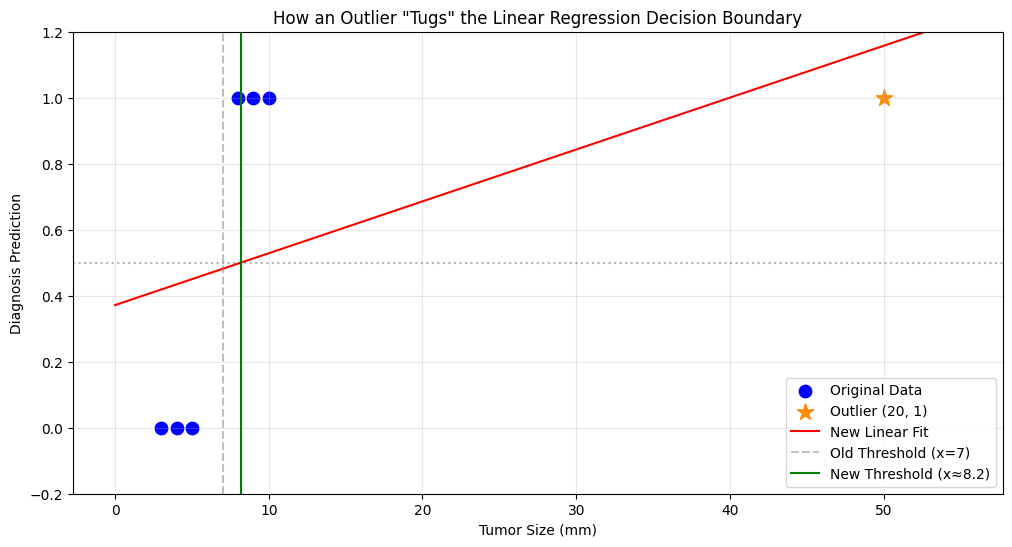

New Decision Threshold (x where y=0.5): 8.17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Original Data + Outlier (20, 1)
x = np.array([3, 5, 8, 4, 9, 10, 50]).reshape(-1, 1)
y = np.array([0, 0, 1, 0, 1, 1, 1])

# Fit the Model
model = LinearRegression()
model.fit(x, y)

# Generate line for plotting
x_line = np.linspace(0, 55, 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Calculate the new threshold (where y = 0.5)
# 0.5 = mx + b  => x = (0.5 - b) / m
m = model.coef_[0]
b = model.intercept_
new_threshold_x = (0.5 - b) / m

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x[:-1], y[:-1], color='blue', s=80, label='Original Data')
plt.scatter(x[-1], y[-1], color='darkorange', s=150, marker='*', label='Outlier (20, 1)')

plt.plot(x_line, y_line, color='red', label='New Linear Fit')

# Mark the old and new thresholds
plt.axvline(x=7, color='gray', linestyle='--', alpha=0.5, label='Old Threshold (x=7)')
plt.axvline(x=new_threshold_x, color='green', linestyle='-', label=f'New Threshold (x≈{new_threshold_x:.1f})')
plt.axhline(y=0.5, color='black', linestyle=':', alpha=0.3)

plt.title('How an Outlier "Tugs" the Linear Regression Decision Boundary')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Diagnosis Prediction')
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"New Decision Threshold (x where y=0.5): {new_threshold_x:.2f}")

* To move from Linear to Logistic Regression, we have to change how we calculate the output and how we measure "error." Its a 3-step process
**Step 1: The Sigmoid Function (The "Squisher")**
* Linear regression gives us $z = mx + c$, which can be any number from $-\infty$ to $+\infty$. We need a probability between 0 and 1. We use the Sigmoid function. This function "squishes" any input into the $(0, 1)$ range.
<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/sigmoid-activation-function-1_0.png" width="500" height="100">

<img src="https://cdn.botpenguin.com/assets/website/Sigmoid_Function_90ec70976d.png" with="400" height="300">

**Step 2: Log Loss (The "Punisher")**
* We can't use Mean Squared Error (MSE) as used in Linearregression here because the Sigmoid makes the error graph "wavy," which confuses the math. Instead, we use Log Loss (Binary Cross-Entropy)
* If the actual label is $1$ and the model predicts $0.01$, the loss is huge.
* If the model predicts $0.99$, the loss is tiny.
<img src="https://datamonje.com/wp-content/uploads/2022/01/binary-cross-entropy-gradient-for-large-p-values.png" widht="400" height="400">

**Step 3: Gradient Descent (The "Optimizer")**
* The model starts with random $m$ and $b$, calculates the Log Loss, and then takes small steps (learning rate) to change $m$ and $c$ until the loss is as low as possible.
-------------
* Code below shows each step coded manually, it is only for your reference. We will use general skelarn LogisticRegression model which does all the steps for us and is more scalable.


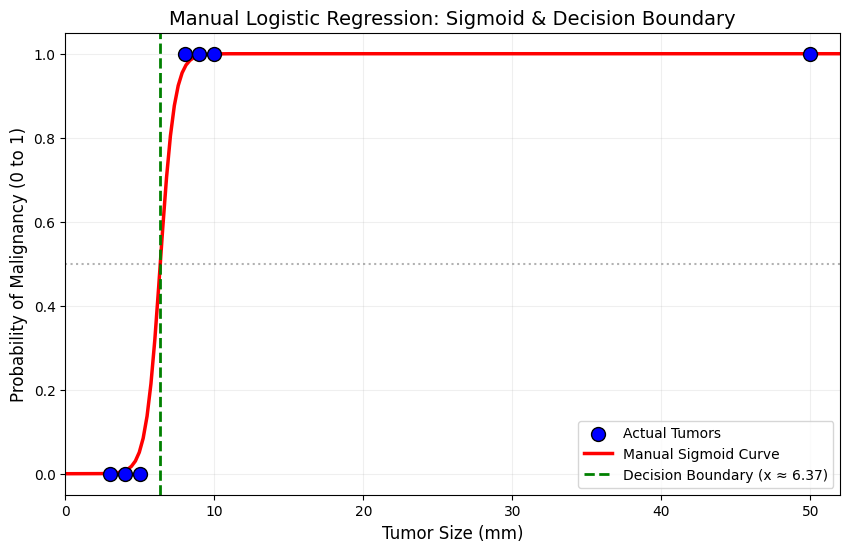

Final Model: P = sigmoid(2.0768 * x + -13.2370)
Decision Boundary at: 6.37 mm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data (including outlier at x=50)
x = np.array([3, 5, 8, 4, 9, 10, 50])
y = np.array([0, 0, 1, 0, 1, 1, 1])

# 2. Manual Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 3. Gradient Descent Setup
m, b = 0.1, -1.0  # Initial weights
lr = 0.1          # Learning rate
epochs = 10000    # More epochs for better convergence

# Training Loop
for _ in range(epochs):
    z = m * x + b
    y_pred = sigmoid(z)

    # Calculate Gradients (Derivative of Log Loss)
    dm = np.mean((y_pred - y) * x)
    db = np.mean(y_pred - y)

    # Update weights
    m -= lr * dm
    b -= lr * db

# 4. Visualization
x_range = np.linspace(0, 52, 200)
z_range = m * x_range + b
y_sigmoid = sigmoid(z_range)

# Calculate the Decision Boundary x = -b/m
decision_boundary = -b / m

plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(x, y, color='blue', edgecolor='k', s=100, label='Actual Tumors', zorder=5)

# Plot the Sigmoid Curve
plt.plot(x_range, y_sigmoid, color='red', linewidth=2.5, label='Manual Sigmoid Curve')

# Plot the Decision Boundary
plt.axvline(x=decision_boundary, color='green', linestyle='--', linewidth=2,
            label=f'Decision Boundary (x ≈ {decision_boundary:.2f})')

# Aesthetics
plt.axhline(y=0.5, color='black', linestyle=':', alpha=0.3) # 0.5 Probability line
plt.title('Manual Logistic Regression: Sigmoid & Decision Boundary', fontsize=14)
plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Probability of Malignancy (0 to 1)', fontsize=12)
plt.ylim(-0.05, 1.05)
plt.xlim(0, 52)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Final Model: P = sigmoid({m:.4f} * x + {b:.4f})")
print(f"Decision Boundary at: {decision_boundary:.2f} mm")

* As you can see above coding Classification is a bit more involved than LinearRegression,fortunately, Scikitlearn (sklearn) module also comes with LogisticRegression model class which reduces the effort to generate the classification model.
* To summarize the plot above:
* **Resistance to Outliers:** Notice how the S-curve stays very flat near $y=1$ as it approaches $x=20$. Unlike a straight line, which would have been "pulled" down by that distant point, the Sigmoid curve just stays saturated at the top.
* **The "Uncertainty Zone":** The steep part of the curve between $x=5$ and $x=8$ represents where the model is gaining confidence.
* **Stability:** Even with the outlier, the boundary remains around $x \approx 6.5$, which correctly classifies the tumors at $x=8, 9, 10,$ and $20$ as malignant.
------
* And now, implementation using sklearn module (notice the model generation step is very similar to LinearRegression 2 line code, the visualization requires some more code)

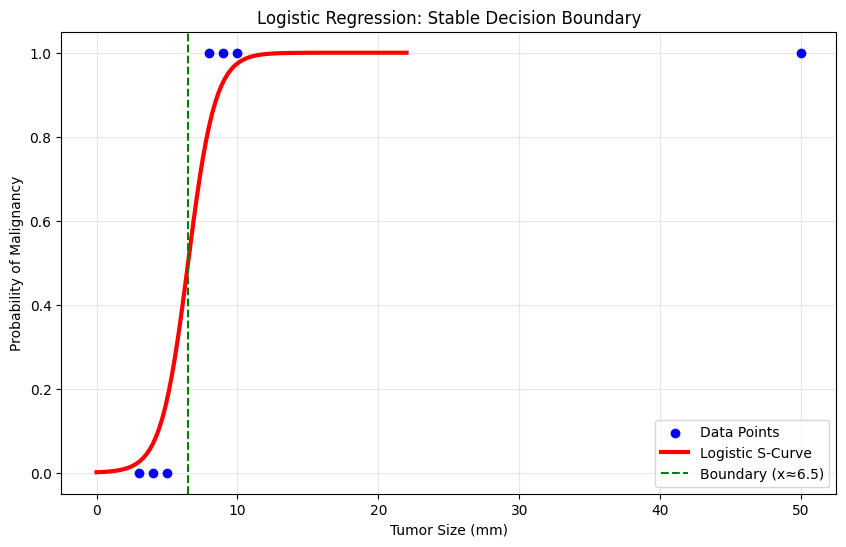

In [ ]:
from sklearn.linear_model import LogisticRegression

# Reshape for sklearn
X_train = x.reshape(-1, 1)

# Fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y)

# Visualization
x_test = np.linspace(0, 22, 100).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_test)[:, 1] # Get probabilities for class 1

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points', zorder=5)
plt.plot(x_test, y_prob, color='red', linewidth=3, label='Logistic S-Curve')

# Decision Boundary (where probability = 0.5)
boundary = -log_reg.intercept_ / log_reg.coef_
plt.axvline(x=boundary, color='green', linestyle='--', label=f'Boundary (x≈{boundary[0][0]:.1f})')

plt.title('Logistic Regression: Stable Decision Boundary')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Probability of Malignancy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Confusion Matrix: determining quality of Classification Model**
* A Confusion Matrix is essentially the "Lie Detector" for machine learning.

<img src="https://www.researchgate.net/publication/377027146/figure/fig5/AS:11431281215285308@1704113587226/The-Matrix-of-TP-FP-FN-TN-Precision-Recall-dan-Accuracy.ppm" width="500" height="300">

**The Core Concept (for the Tumor example)**
* In a binary classification (like our Cancer model), there are four possible outcomes:

  * True Positive (TP): The tumor is Malignant, and the model predicted Malignant. (Correct ✅)

  * True Negative (TN): The tumor is Benign, and the model predicted Benign. (Correct ✅)

  * False Positive (FP): The tumor is Benign, but the model predicted Malignant. (Type I Error ❌ - False Alarm)

  * False Negative (FN): The tumor is Malignant, but the model predicted Benign. (Type II Error ❌ - Dangerous Miss)

**Calculation for our Tumor Data**
* Let's look at our data with the decision boundary we found ($x \approx 6.5$):
  * Actual $y$: [0, 0, 1, 0, 1, 1, 1] (3 Benign, 4 Malignant)
  * Predicted $\hat{y}$: * $x=3, 4, 5$ are $< 6.5 \implies$ Predicted 0
  * $x=8, 9, 10, 20$ are $> 6.5 \implies$ Predicted 1
  * The Tally:
      * TN: Actual 0, Predicted 0 $\rightarrow$ 3
      * TP: Actual 1, Predicted 1 $\rightarrow$ 4
      * FP: Actual 0, Predicted 1 $\rightarrow$ 0
      * FN: Actual 1, Predicted 0 $\rightarrow$ 0
* $\text{Accuracy} = \text{% of correct prediction} = \frac{TP+TN}{TP+TN+FP+FN}$
* $\text{Precision} = \text{actual positive prediction out of all positive prediction} = \frac{TP}{TP+FP} $
* $\text{recall} = \text{actual positive prediction out of all actual positive labels} = \frac{TP}{TP+FN} $


| |  |Predicted Benign(0)|Predicted Malignant(1)| |
|--|--|--|--|--|
|Actual Benign(0)|3(TN)|0(FP)||
|Actual Malignant(1)|0 (FN)| 4(TP) | Recall=$\frac{4}{4+0}=4/4=1$|
| | | $Precision=\frac{4}{4+0}=4/4=1$| Accuracy=$\frac{4+3}{4+0+3+0}=7/7=1 $|

* In our simple example, we have perfect Precision and Recall, it typically not the case in practical dataset.
  * For example if Recall were too low, means false negatives were high, which means model will be mis-diagnosing people who may have cancer and they may not get correct treatment.

  * If Precision were too low, that means there were too many false positives, model predicts more people to have cancer than actually there are, in this case it will be costly to treat people who may not have cancer.

* If you have a model with 100% Precision but 0% Recall, it’s useless. If it has 100% Recall but 0% Precision, it’s also useless. The F1-score ensures that a model is performing well on both fronts. The F1-Score  finds the perfect balance between Precision (avoiding false alarms) and Recall (avoiding missed cases).
* $ \text{F1} = 2 * \frac{Precision * Recall}{Precision+Recall} $
   * for our dataset: $F1 = 2 * \frac{1*1}{1+1}=1$
   * imagine out model missed one malignant tumor (a False Negative):
      * TP = 3, FP = 0, FN = 1
      * Precision = $\frac{3}{3+0} = 1.0$
      * Recall = $\frac{3}{3+1} = 0.75$
      * F1-Score = $2 \cdot \frac{1.0 \cdot 0.75}{1.0 + 0.75} \approx \mathbf{0.85}$
      * Even though the Precision was "perfect," the F1-score dropped to 0.85 to warn you that your Recall is lagging.

* Lets use python and sklearn module to calculate the confusion matrix




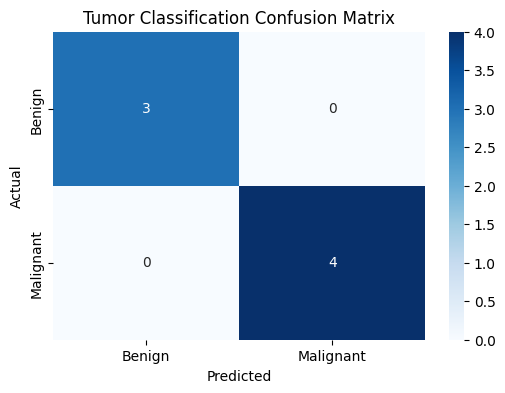

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt







# Actual and Predicted values based on our threshold x=6.5
y_actual = [0, 0, 1, 0, 1, 1, 1]
y_pred = [0, 0, 1, 0, 1, 1, 1] # Our model was perfect for this small sample!

# Generate Matrix
cm = confusion_matrix(y_actual, y_pred)

# Plotting with Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tumor Classification Confusion Matrix')
plt.show()

# Print full report (Precision, Recall, F1)
print(classification_report(y_actual, y_pred))
print(f"Precision: {precision_score(y_actual, y_pred)}")
print(f"Recall: {recall_score(y_actual, y_pred)}")
print(f"F1-Score: {f1_score(y_actual, y_pred)}")


** Titanic – Machine Learning from Disaster Dataset for Classification**
<img src="https://storage.googleapis.com/kaggle-datasets-images/1818188/2965537/c43e21161e466bfc4d19740585bc5a5d/dataset-card.jpg?t=2021-12-24-14-54-39" width="300" height="400">

* The Titanic's sinking in 1912 led to 1502 deaths out of 2224 people due to insufficient lifeboats. This challenge asks you to predict which passengers were more likely to survive using data such as age, gender, and class
* It’s Kaggle’s most popular beginner classification dataset. [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic/data)
* Goal: predict who survived the Titanic (Survived = 0 or 1).
* Includes both numerical and categorical features, perfect for logistic regression practice
* the data is split to 3 files: first train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). The values in the second column ("Survived") can be used to determine whether each passenger survived or not:
  * if it's a "1", the passenger survived.
  * if it's a "0", the passenger died.
* second, test.csv: Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived. Notice this file is not what we typically have as train-test split, it is simply to asceratin how good is your model in the competition. it is missing survivor column which is our target variable

**Lets build a Classification model for the Titanic Dataset**

In [1]:
#Import necessary modules
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
# Load data from google drive


from google.colab import drive
drive.mount('/content/drive')



file_path_train = "/content/drive/My Drive/Colab Notebooks/train_titanic_classification.csv"
file_path_test = "/content/drive/My Drive/Colab Notebooks/test_titanic_classification.csv"

# Load training and test datasets
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

# Show first few rows of training data
train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Check structure of the dataset
print("info about training dataset")
print(train_df.info())

info about training dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
#data preprocessing and cleanup
# Count missing values in each column
#Columns with large missing values need cleaning
print("count of missing values in each feature column")
print(train_df.isnull().sum())




count of missing values in each feature column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#Target value (label) Count survival vs non-survival
print(train_df["Survived"].value_counts())



Survived
0    549
1    342
Name: count, dtype: int64


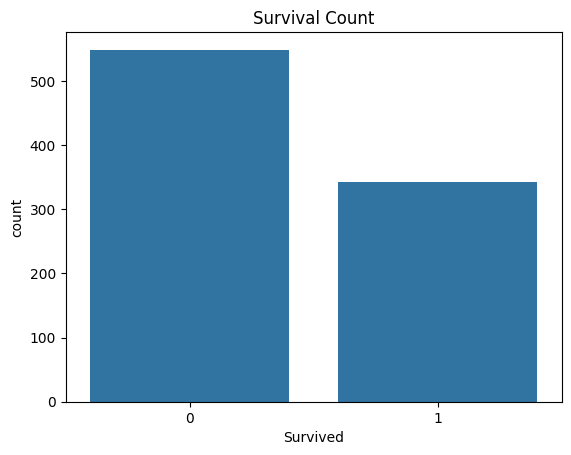

In [10]:
# Visualize survival distribution
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()

In [18]:
# Check for duplicate rows
print("duplicate entries check")
print(train_df.duplicated().sum())

print("Remove duplicates if any")
train_df = train_df.drop_duplicates()

duplicate entries check
0
Remove duplicates if any


In [19]:
# Fill missing Age values with mean
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

# Fill missing Embarked values with mode
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-3203542116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
/tmp/ipython-input-3203542116.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [20]:
# Drop columns that don't help prediction
#These columns are text-heavy or mostly missing
columns_to_drop = ["Name", "Ticket", "Cabin"]

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [21]:
# Convert categorical columns to numerical using one-hot encoding: Sex, Embarked are categorical values
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"], drop_first=True)

In [23]:
# Separate input features (X) and target variable (y) in train dataset
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [24]:
# Split train data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Create logistic regression model
model = LogisticRegression(max_iter=1000) #max_iter is specified to help train the model longer

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Predict survival on test set
y_pred = model.predict(X_val)

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


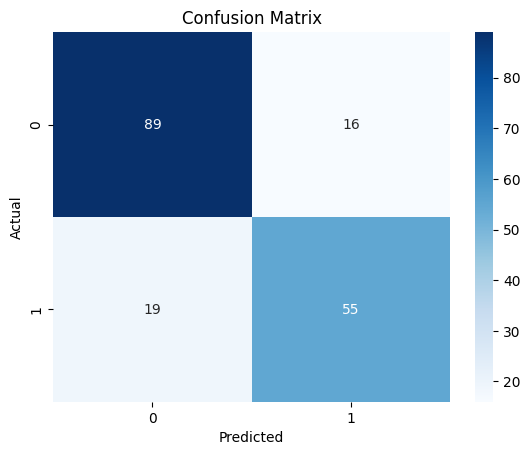

In [29]:
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Print full report (Precision, Recall, F1)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score


print(classification_report(y_val, y_pred))
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1-Score: {f1_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-Score: 0.7586206896551724


In [30]:
# Predict survival for test dataset
#test_predictions = model.predict(test_df)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values